# 문제 정의
- 물 마시는 텀블러의 각도를 3초 동안 0.1초 단위로 수집하여 특성 데이터로 설정한다.
- 텀블러에서 물이 흘러나온 양을 레이블 데이터로 설정한다.
- 회귀 분석을 시도한다.

# 데이터 수집

In [2]:
# DB -> Flask -> Local
import pymysql as ps
import pandas as pd

# 데이터베이스 연결
def con():
    conn = ps.connect(host='localhost', user='root', passwd='12345', db='aqu4men')
    return conn
conn = con()
curs = conn.cursor()
sql = f"select * from t_cupholder "
curs.execute(sql)
colname = curs.description
rows = curs.fetchall()
curs.close()
conn.close()

col=[]
for i in colname:
    col.append(i[0].lower())
cov = pd.DataFrame(list(rows), columns = col)

# 불용 데이터 칼럼 drop and save
cov2=cov.iloc[:, 3:]
for i in range(1,31):
    cov2.drop(f'x{i}',axis=1,inplace=True)
cov3 = cov2
cov3.drop("t",axis=1,inplace=True)

cov3.to_csv("rawdata1000.csv", encoding="UTF-8-sig", index=False)
cov3.drop("index", axis=1, inplace=True)
cov3

y1  y2  y3  y4  y5  y6  y7  y8  y9  y10  ...  y22  y23  y24  y25  y26  \
0     0   1   7  13  22  31  35  39  44   50  ...   65   65   66   67   67   
1     0   3   7  13  18  22  29  31  33   36  ...   55   54   54   54   54   
2    -8   0   8  15  22  27  30  33  37   41  ...   54   55   56   57   57   
3    -5  -1   1   5  11  15  19  25  29   33  ...   39   39   39   38   38   
4    12  15  18  22  23  25  27  29  30   31  ...   32   32   32   31   31   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...  ...   
995   3   6  12  19  27  35  42  49  56   60  ...   79   79   79   79   79   
996   1   2   5  11  17  22  28  34  39   42  ...   51   50   49   48   47   
997   1   3   8  15  23  29  36  43  47   51  ...   61   61   60   59   59   
998   1   4  10  17  23  29  35  41  46   50  ...   63   63   63   62   61   
999   0   0   4  11  17  23  30  36  40   44  ...   69   68   68   68   67   

     y27  y28  y29  y30  label  
0     68   68   68   68     62  
1     54   54   54   54     32  
2     58   58   59   59     46  
3     38   38   37   36     59  
4     31   31   31   31     91  
..   ...  ...  ...  ...    ...  
995   79   79   79   79     95  
996   47   47   47   46     62  
997   58   57   57   56     76  
998   60   59   58   57     76  
999   66   65   65   64     81  

[1000 rows x 31 columns]

In [9]:
# Local to Flask
import pandas as pd
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 32
data = pd.read_csv('data/rawdata.csv',encoding='utf-8')
data.drop(["Unnamed: 0","index"],axis=1,inplace=True)
data

y1  y2  y3  y4  y5  y6  y7  y8  y9  y10  y11  y12  y13  y14  y15  y16  \
0     0   1   7  13  22  31  35  39  44   50   54   56   56   57   58   60   
1     0   3   7  13  18  22  29  31  33   36   40   44   46   47   49   51   
2    -8   0   8  15  22  27  30  33  37   41   43   45   46   47   48   50   
3    -5  -1   1   5  11  15  19  25  29   33   37   39   40   41   41   41   
4    12  15  18  22  23  25  27  29  30   31   32   32   32   32   32   32   
5    13  13  15  19  24  27  30  33  36   37   38   39   40   40   40   40   
6    11  11  13  17  20  26  31  35  38   40   41   41   41   42   44   43   
7     7  10  13  16  20  24  29  34  38   41   43   45   46   47   47   48   
8    12  15  17  21  25  30  34  38  41   44   49   51   52   53   54   55   
9     0  -1   0   7  13  19  26  31  35   39   42   45   48   51   53   54   
10   18  21  26  31  35  38  41  43  45   47   49   51   53   55   56   57   
11   37  41  44  47  50  53  57  59  61   62   63   63   64   65   65   66   
12   12  17  23  29  35  39  45  50  55   59   61   63   64   65   66   66   
13   -4   0   1   1   2   7  14  23  32   40   45   50   52   54   55   56   
14   12  19  26  34  40  48  54  59  64   68   70   72   73   73   72   72   
15   20  25  29  36  43  48  52  56  60   64   69   73   74   75   75   75   
16   28  35  39  45  50  56  61  65  69   72   73   74   75   75   75   76   
17    6  10  16  26  36  44  52  61  68   73   77   80   81   82   82   83   
18   16  22  31  40  50  56  61  66  68   70   71   72   72   72   72   71   
19    9  10  17  22  30  36  42  46  50   53   56   58   58   59   59   59   
20   23  27  34  43  50  56  61  65  66   68   69   70   70   70   70   70   
21    0   1   4   9  13  16  21  27  33   38   42   45   47   49   51   52   
22   10  13  17  22  27  32  35  39  42   45   47   49   50   51   51   51   
23    9  11  13  16  21  26  34  39  44   48   51   52   53   54   54   54   
24    2   3   8  12  16  22  28  33  36   39   41   43   45   46   47   47   
25   19  23  28  33  38  43  47  50  53   55   56   57   57   57   57   57   
26   18  22  24  29  34  38  43  47  51   54   57   59   61   61   61   61   
27    3   6  12  18  23  28  38  44  49   54   58   61   65   66   67   68   
28   16  21  29  38  44  48  51  54  57   59   61   61   62   63   63   63   
29   21  27  35  41  46  50  52  53  54   54   54   54   54   54   54   54   
30   38  43  46  49  51  52  53  53  53   53   53   53   53   53   53   53   
31   32  39  47  52  55  58  59  60  60   59   59   59   58   57   57   57   
32   40  43  45  47  48  48  48  48  48   48   48   48   49   49   50   51   
33   49  54  57  59  61  63  64  64  64   65   66   66   66   66   66   66   
34   50  57  63  68  71  72  73  74  74   74   74   75   75   75   75   75   
35   13  18  24  30  37  42  47  51  52   53   53   53   53   53   53   53   
36    0   2   4   7  12  17  22  28  33   35   37   40   43   45   47   49   
37   23  25  29  33  35  39  42  45  47   49   51   52   52   52   53   54   
38   23  27  33  39  43  49  55  58  62   66   65   63   63   62   61   60   
39    0   2   6  12  19  26  36  43  49   54   59   64   66   68   69   70   
40    9  10  14  21  31  37  42  47  51   54   56   57   58   59   60   60   
41   20  20   3   7  13  23  34  42  47   50   52   55   55   55   55   55   
42    2   6  12  21  29  37  42  45  49   54   58   60   62   63   63   63   
43   -1  -1   0   6  13  22  32  40  48   56   62   67   66   66   67   66   
44   12  16  22  30  37  43  49  52  55   59   62   63   63   64   64   64   
45    0   2   6  12  19  27  34  40  45   48   51   55   58   61   64   65   
46   18  21  26  33  40  44  48  52  54   56   58   60   62   63   64   65   
47    0   1   2   9  19  28  34  38  40   44   48   50   51   52   53   53   
48   14  18  22  29  33  37  40  42  44   45   46   47   47   47   47   47   
49    1   5   9  15  21  25  29  33  37   40   43   46   49   51   53   54   
50    0   1   1   3   9  15

# EDA

#### 결측치, 이상치 제거

In [10]:
data.drop(4, axis=0, inplace=True)
data.drop(18, axis=0, inplace=True)
data.drop(34, axis=0, inplace=True)
data.drop(216, axis=0, inplace=True)
data.drop(227, axis=0, inplace=True)
data.drop(228, axis=0, inplace=True)
data.drop(229, axis=0, inplace=True)
data.drop(237, axis=0, inplace=True)
data.drop(238, axis=0, inplace=True)
data.drop(239, axis=0, inplace=True)
data.drop(243, axis=0, inplace=True)
data.drop(244, axis=0, inplace=True)
data.drop(282, axis=0, inplace=True)
data.drop(387, axis=0, inplace=True)
data.drop(810, axis=0, inplace=True)
data

y1  y2  y3  y4  y5  y6  y7  y8  y9  y10  y11  y12  y13  y14  y15  y16  \
0     0   1   7  13  22  31  35  39  44   50   54   56   56   57   58   60   
1     0   3   7  13  18  22  29  31  33   36   40   44   46   47   49   51   
2    -8   0   8  15  22  27  30  33  37   41   43   45   46   47   48   50   
3    -5  -1   1   5  11  15  19  25  29   33   37   39   40   41   41   41   
5    13  13  15  19  24  27  30  33  36   37   38   39   40   40   40   40   
6    11  11  13  17  20  26  31  35  38   40   41   41   41   42   44   43   
7     7  10  13  16  20  24  29  34  38   41   43   45   46   47   47   48   
8    12  15  17  21  25  30  34  38  41   44   49   51   52   53   54   55   
9     0  -1   0   7  13  19  26  31  35   39   42   45   48   51   53   54   
10   18  21  26  31  35  38  41  43  45   47   49   51   53   55   56   57   
11   37  41  44  47  50  53  57  59  61   62   63   63   64   65   65   66   
12   12  17  23  29  35  39  45  50  55   59   61   63   64   65   66   66   
13   -4   0   1   1   2   7  14  23  32   40   45   50   52   54   55   56   
14   12  19  26  34  40  48  54  59  64   68   70   72   73   73   72   72   
15   20  25  29  36  43  48  52  56  60   64   69   73   74   75   75   75   
16   28  35  39  45  50  56  61  65  69   72   73   74   75   75   75   76   
17    6  10  16  26  36  44  52  61  68   73   77   80   81   82   82   83   
19    9  10  17  22  30  36  42  46  50   53   56   58   58   59   59   59   
20   23  27  34  43  50  56  61  65  66   68   69   70   70   70   70   70   
21    0   1   4   9  13  16  21  27  33   38   42   45   47   49   51   52   
22   10  13  17  22  27  32  35  39  42   45   47   49   50   51   51   51   
23    9  11  13  16  21  26  34  39  44   48   51   52   53   54   54   54   
24    2   3   8  12  16  22  28  33  36   39   41   43   45   46   47   47   
25   19  23  28  33  38  43  47  50  53   55   56   57   57   57   57   57   
26   18  22  24  29  34  38  43  47  51   54   57   59   61   61   61   61   
27    3   6  12  18  23  28  38  44  49   54   58   61   65   66   67   68   
28   16  21  29  38  44  48  51  54  57   59   61   61   62   63   63   63   
29   21  27  35  41  46  50  52  53  54   54   54   54   54   54   54   54   
30   38  43  46  49  51  52  53  53  53   53   53   53   53   53   53   53   
31   32  39  47  52  55  58  59  60  60   59   59   59   58   57   57   57   
32   40  43  45  47  48  48  48  48  48   48   48   48   49   49   50   51   
33   49  54  57  59  61  63  64  64  64   65   66   66   66   66   66   66   
35   13  18  24  30  37  42  47  51  52   53   53   53   53   53   53   53   
36    0   2   4   7  12  17  22  28  33   35   37   40   43   45   47   49   
37   23  25  29  33  35  39  42  45  47   49   51   52   52   52   53   54   
38   23  27  33  39  43  49  55  58  62   66   65   63   63   62   61   60   
39    0   2   6  12  19  26  36  43  49   54   59   64   66   68   69   70   
40    9  10  14  21  31  37  42  47  51   54   56   57   58   59   60   60   
41   20  20   3   7  13  23  34  42  47   50   52   55   55   55   55   55   
42    2   6  12  21  29  37  42  45  49   54   58   60   62   63   63   63   
43   -1  -1   0   6  13  22  32  40  48   56   62   67   66   66   67   66   
44   12  16  22  30  37  43  49  52  55   59   62   63   63   64   64   64   
45    0   2   6  12  19  27  34  40  45   48   51   55   58   61   64   65   
46   18  21  26  33  40  44  48  52  54   56   58   60   62   63   64   65   
47    0   1   2   9  19  28  34  38  40   44   48   50   51   52   53   53   
48   14  18  22  29  33  37  40  42  44   45   46   47   47   47   47   47   
49    1   5   9  15  21  25  29  33  37   40   43   46   49   51   53   54   
50    0   1   1   3   9  15  21  26  32   36   39   42   45   48   50   52   
51    0   2   9  19  26  32  38  44  49   52   54   56   58   59   59   60   
52    3   6  11  18  25  30  35  40  45   48   51   53   56   59   61   62   
53    1   4   8  13  19  28

#### 특성 데이터와 레이블 데이터로 분리

In [11]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
print(X.shape, y.shape)

(985, 30) (985,)


#### 다중공선성 문제
- 다중공선성(공선: 1차함수 그래프 위에서 기울기와 y절편이 같은 것)  
  다중공선성(독립변수간에 상관관계가 높은 경우 즉, 선형독립이 아닌 경우) 과적합 문제가 있다.  

- 다중 공선성을 없애는 가장 기본적인 방법은 다른 독립변수에 의존하는 변수를 없애는 것이다.  
  기장 의존적인 독립변수를 선택하는 방법으로는 VIF(Variance Inflation Factor)를 사용할 수 있다.

- 해결방법   
  (1) 변수 선택법으로 의존적인 변수 삭제  
  (2) PCA(principal component analysis) 방법으로 위존적인 성분 삭제  

  - 조건수 감소 방법
      - 스케일링 : 변수들의 단위차로 숫자의 스케일이 다른 경우
      - 차원축소 : VIF(Variance Inflation Factor), PCA(Prinsipal Component Analysis)

In [12]:
data.corr()

y1        y2        y3        y4        y5        y6        y7  \
y1     1.000000  0.968155  0.874044  0.750095  0.671861  0.602102  0.524516   
y2     0.968155  1.000000  0.946426  0.846488  0.772836  0.703182  0.623705   
y3     0.874044  0.946426  1.000000  0.953262  0.893821  0.826432  0.749738   
y4     0.750095  0.846488  0.953262  1.000000  0.975423  0.926196  0.864835   
y5     0.671861  0.772836  0.893821  0.975423  1.000000  0.977345  0.933049   
y6     0.602102  0.703182  0.826432  0.926196  0.977345  1.000000  0.980072   
y7     0.524516  0.623705  0.749738  0.864835  0.933049  0.980072  1.000000   
y8     0.449596  0.545906  0.672961  0.799965  0.880766  0.941401  0.982561   
y9     0.380101  0.470912  0.595307  0.727457  0.817680  0.889110  0.944893   
y10    0.309285  0.393880  0.516018  0.650959  0.748136  0.828428  0.896701   
y11    0.241960  0.318579  0.435915  0.571558  0.675245  0.762174  0.840315   
y12    0.178774  0.248255  0.360663  0.494482  0.602406  0.693595  0.778885   
y13    0.122098  0.184570  0.291586  0.423767  0.535105  0.628753  0.718124   
y14    0.074026  0.129673  0.230589  0.358376  0.470809  0.565626  0.657853   
y15    0.034166  0.082150  0.176165  0.299272  0.410711  0.505371  0.599551   
y16    0.007908  0.049871  0.136899  0.254557  0.363439  0.457193  0.551456   
y17   -0.014061  0.023716  0.105860  0.219098  0.325874  0.418301  0.512164   
y18   -0.023069  0.010711  0.088160  0.196717  0.301226  0.392489  0.485343   
y19   -0.031059  0.000495  0.074589  0.179713  0.281908  0.372235  0.464391   
y20   -0.035433 -0.005440  0.066187  0.169259  0.270432  0.360002  0.451672   
y21   -0.037596 -0.009807  0.059805  0.160644  0.260676  0.349455  0.440646   
y22   -0.037022 -0.010350  0.057871  0.156744  0.255130  0.343134  0.433628   
y23   -0.037603 -0.012271  0.053700  0.150194  0.247196  0.334487  0.424840   
y24   -0.039064 -0.014994  0.049357  0.144191  0.240376  0.327121  0.416718   
y25   -0.037548 -0.014964  0.047768  0.140926  0.236115  0.321990  0.410545   
y26   -0.037188 -0.016322  0.044322  0.135896  0.230203  0.315671  0.403566   
y27   -0.035171 -0.015143  0.044118  0.134613  0.228690  0.313772  0.401114   
y28   -0.035813 -0.016820  0.040851  0.129947  0.223373  0.307810  0.394672   
y29   -0.036184 -0.018294  0.037384  0.124839  0.217382  0.301367  0.387448   
y30   -0.033280 -0.016966  0.035195  0.120132  0.210540  0.293041  0.376935   
label  0.123188  0.152235  0.202689  0.253795  0.282800  0.307831  0.335530   

             y8        y9       y10       y11       y12       y13       y14  \
y1     0.449596  0.380101  0.309285  0.241960  0.178774  0.122098  0.074026   
y2     0.545906  0.470912  0.393880  0.318579  0.248255  0.184570  0.129673   
y3     0.672961  0.595307  0.516018  0.435915  0.360663  0.291586  0.230589   
y4     0.799965  0.727457  0.650959  0.571558  0.494482  0.423767  0.358376   
y5     0.880766  0.817680  0.748136  0.675245  0.602406  0.535105  0.470809   
y6     0.941401  0.889110  0.828428  0.762174  0.693595  0.628753  0.565626   
y7     0.982561  0.944893  0.896701  0.840315  0.778885  0.718124  0.657853   
y8     1.000000  0.981926  0.948848  0.903117  0.851228  0.796899  0.740617   
y9     0.981926  1.000000  0.985107  0.952285  0.910814  0.864033  0.814499   
y10    0.948848  0.985107  1.000000  0.986144  0.959037  0.922992  0.882517   
y11    0.903117  0.952285  0.986144  1.000000  0.988169  0.963759  0.932374   
y12    0.851228  0.910814  0.959037  0.988169  1.000000  0.989460  0.968627   
y13    0.796899  0.864033  0.922992  0.963759  0.989460  1.000000  0.991569   
y14    0.740617  0.814499  0.882517  0.932374  0.968627  0.991569  1.000000   
y15    0.686273  0.765233  0.840134  0.897412  0.942607  0.975015  0.993018   
y16    0.640137  0.721992  0.801699  0.864179  0.915981  0.955232  0.980096   
y17    0.601599  0.685508  0.768169  0.834280  0.891235  0.935488  0.964912   
y18    0.574319  0.659258  0.743396  0.811530  0.871187  0.918

#### 히트맵을 통해 변수들 간의 상관관계 시각화

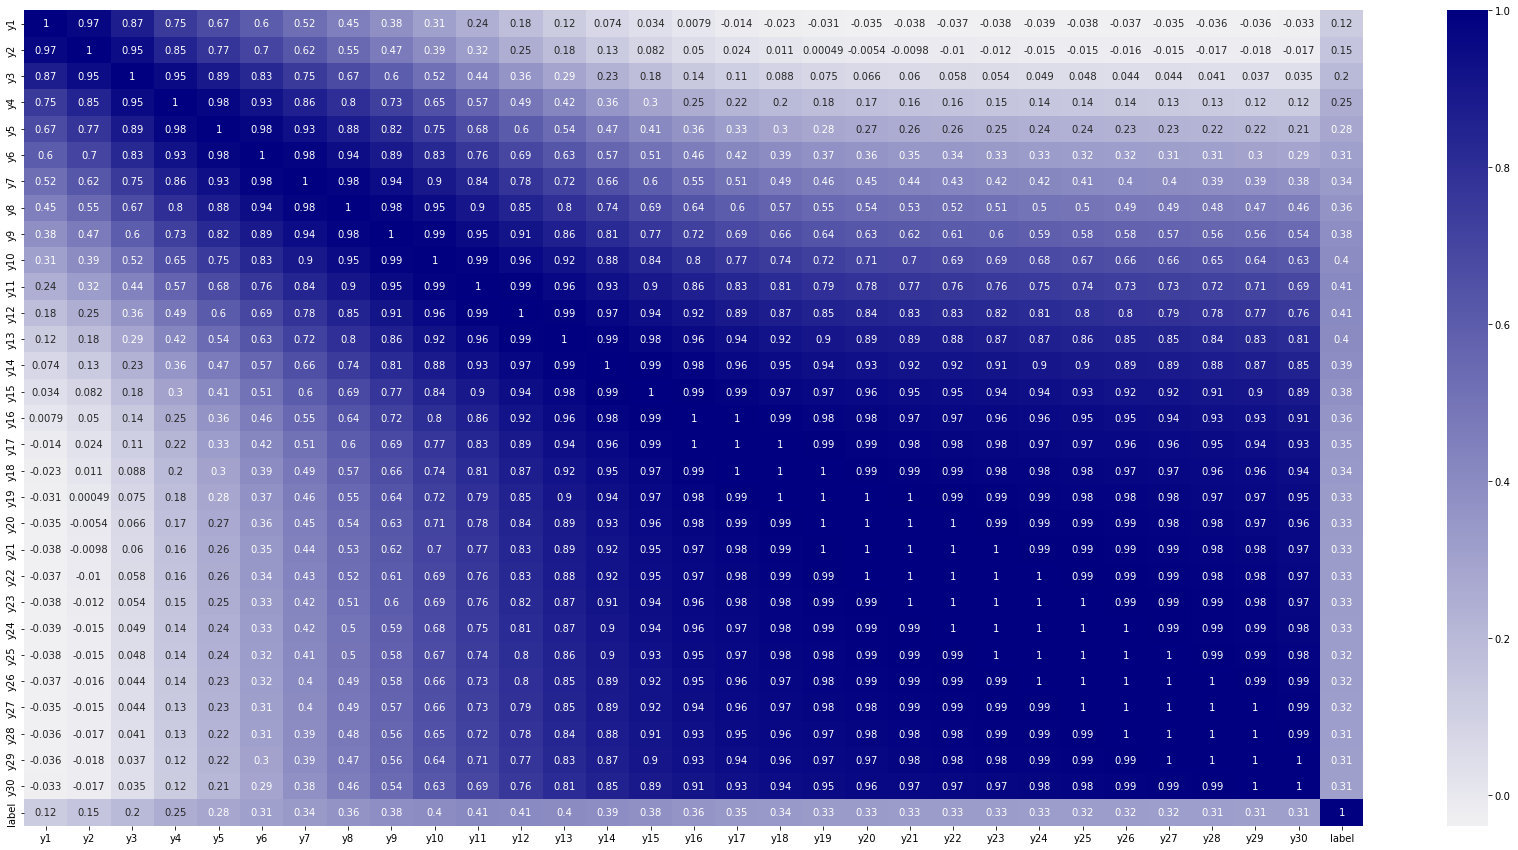

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30,15))
cmap = sns .light_palette("navy", as_cmap=True)
sns.heatmap(data.corr(), annot=True, cmap=cmap)
plt.show()

#### VIF(분산팽창계수)를 계산하여 다중공선성 해소 시도
- VIF Factor가 낮은 특성들부터 순차적으로 넣어서 모델을 학습한다.
- 학습한 모델들을 순차적으로 테스트하여 결과를 matplolib으로 시각화한다.
- 그래프를 통해 과적합 구간 이전의 특성까지 선택한다.

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

VIF Factor features
0      31.482283       y1
1      94.391850       y2
2     157.556292       y3
3     497.176473       y4
4    1215.999511       y5
5    2130.364849       y6
6    3323.479355       y7
7    4072.212385       y8
8    5683.005188       y9
9    8858.583544      y10
10   9394.141215      y11
11  12057.371693      y12
12  15827.625905      y13
13  19000.700050      y14
14  23264.078263      y15
15  29577.817033      y16
16  33483.210740      y17
17  39157.520169      y18
18  46463.712271      y19
19  48322.220411      y20
20  53466.772743      y21
21  54363.925551      y22
22  51890.411111      y23
23  51274.780492      y24
24  52888.913755      y25
25  46410.041514      y26
26  43520.854102      y27
27  43329.984875      y28
28  33935.568413      y29
29   7706.099224      y30

In [17]:
# 오름차순으로 정렬 (낮은 것 부터 순서대로 넣으니까)
vif_sort = vif.sort_values(by='VIF Factor', ascending=True)
vif_sort

VIF Factor features
0      31.482283       y1
1      94.391850       y2
2     157.556292       y3
3     497.176473       y4
4    1215.999511       y5
5    2130.364849       y6
6    3323.479355       y7
7    4072.212385       y8
8    5683.005188       y9
29   7706.099224      y30
9    8858.583544      y10
10   9394.141215      y11
11  12057.371693      y12
12  15827.625905      y13
13  19000.700050      y14
14  23264.078263      y15
15  29577.817033      y16
16  33483.210740      y17
28  33935.568413      y29
17  39157.520169      y18
27  43329.984875      y28
26  43520.854102      y27
25  46410.041514      y26
18  46463.712271      y19
19  48322.220411      y20
23  51274.780492      y24
22  51890.411111      y23
24  52888.913755      y25
20  53466.772743      y21
21  54363.925551      y22

# 지도학습 : 회귀

In [63]:
# train 데이터와 test 데이터로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=999)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(738, 30) (738,) (247, 30) (247,)


## Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


lr = LinearRegression()
lr.fit(X_train, y_train)

print('score')
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

train_pred_y = lr.predict(X_train)
test_pred_y = lr.predict(X_test)

print('RMSE')
print(np.sqrt(mean_squared_error(train_pred_y, y_train)))
print(np.sqrt(mean_squared_error(test_pred_y, y_test)))

y_colname = ["label"]
X_colname = ['y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'y9', 'y10', 'y11',
        'y12', 'y13', 'y14', 'y15', 'y16', 'y17', 'y18', 'y19', 'y20', 'y21',
        'y22', 'y23', 'y24', 'y25', 'y26', 'y27', 'y28', 'y29', 'y30']

score
0.20590192432660748
0.1277296273444647
RMSE
12.072253617374434
12.691056889890767


In [19]:
X_col = []
for i in vif_sort["features"]:
    X_col.append(i)
    var_col=data[X_col]
    print(var_col)

     y1
0     0
1     0
2    -8
3    -5
5    13
6    11
7     7
8    12
9     0
10   18
11   37
12   12
13   -4
14   12
15   20
16   28
17    6
19    9
20   23
21    0
22   10
23    9
24    2
25   19
26   18
27    3
28   16
29   21
30   38
31   32
32   40
33   49
35   13
36    0
37   23
38   23
39    0
40    9
41   20
42    2
43   -1
44   12
45    0
46   18
47    0
48   14
49    1
50    0
51    0
52    3
53    1
54    4
55   10
56    2
57    1
58    9
59   23
60    9
61   15
62   12
63    3
64   -5
65   12
66    2
67    1
68   16
69    8
70   -4
71   -1
72    3
73    7
74    6
75   -4
76    7
77    0
78   -1
79    4
80    5
81    1
82    4
83   10
84    4
85    3
86    2
87    1
88    6
89    1
90    3
91    2
92    4
93    9
94    0
95    0
96    2
97    4
98   12
99    6
100   3
101   6
102   1
103   0
104   0
105   1
106   7
107   0
108   2
109   0
110   0
111   3
112   0
113   1
114   0
115   2
116   0
117   1
118   3
119   4
120   2
121   0
122   1
123   3
124   2
125   0
126   0


y1컬럼까지 사용
Train 정확도 : 0.01994650112529406
Test 정확도 : -0.023899381440231293
Train 오차 :  13.41146345686063
Test 오차 :  13.749942133428815
 
y2컬럼까지 사용
Train 정확도 : 0.030531396172412184
Test 정확도 : 0.01017286551926111
Train 오차 :  13.338842769390734
Test 오차 :  13.51922847488555
 
y3컬럼까지 사용
Train 정확도 : 0.05203621626604005
Test 정확도 : 0.040721291635201995
Train 오차 :  13.19007155979339
Test 오차 :  13.308975719019815
 
y4컬럼까지 사용
Train 정확도 : 0.08266206455098746
Test 정확도 : 0.05226231829420791
Train 오차 :  12.975256611960347
Test 오차 :  13.228673702371808
 
y5컬럼까지 사용
Train 정확도 : 0.0971052842827087
Test 정확도 : 0.05499525275183004
Train 오차 :  12.872705525148026
Test 오차 :  13.20958656483045
 
y6컬럼까지 사용
Train 정확도 : 0.11049211457238683
Test 정확도 : 0.06460607437122612
Train 오차 :  12.776920132428183
Test 오차 :  13.142243295078298
 
y7컬럼까지 사용
Train 정확도 : 0.12335260144968707
Test 정확도 : 0.10441346959223585
Train 오차 :  12.684219621550604
Test 오차 :  12.859556968052209
 
y8컬럼까지 사용
Train 정확도 : 0.15431926645518257
Test 정확

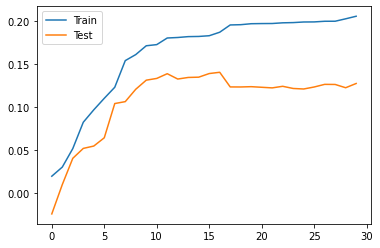

In [21]:
X_col = []
Train_list = []
Test_list = []
for i in vif_sort["features"]:
    X_col.append(i)
    var_col=data[X_col] #feature
    y #label
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    X_train, X_test, y_train, y_test = train_test_split(var_col,y,random_state=999)
    lr.fit(X_train, y_train)
    
    print(f'{i}컬럼까지 사용')
    print("Train 정확도 :",lr.score(X_train, y_train))
    print("Test 정확도 :",lr.score(X_test, y_test))
    
    train_pred_y = lr.predict(X_train)
    test_pred_y = lr.predict(X_test)
    print("Train 오차 : ",np.sqrt(mean_squared_error(train_pred_y, y_train)))
    print("Test 오차 : ",np.sqrt(mean_squared_error(test_pred_y, y_test)))
    print(" ")
    
    Train_scor=lr.score(X_train, y_train)
    Train_list.append(Train_scor)
    Test_scor=lr.score(X_test, y_test)
    Test_list.append(Test_scor)
    
plt.plot(range(0, len(Train_list)), Train_list, label="Train")
plt.plot(range(0, len(Train_list)), Test_list, label="Test")
plt.legend()
plt.show()

### 결과 : 과소적합
- Over Fitting을 우려하였으나 Under Fitting 발생 -> train 데이터도 모델이 제대로 학습하지 못한 상태

#### 원인 예측
- 모델이 너무 단순하거나 데이터 셋이 너무 작기 때문이라고 예측   
  (L1, L2규제는 과적합을 해결하기 위한 것인데 우리는 과소적합이니까 지금 사용하는 것은 적합하지 않다.)
  
#### 해소방안
- 과소적합을 해소하기 위하여 Linear 보다 복잡하고 정확도를 높일 수 있는 앙상블 모델로 다시 시도

## Gradient Boost Model

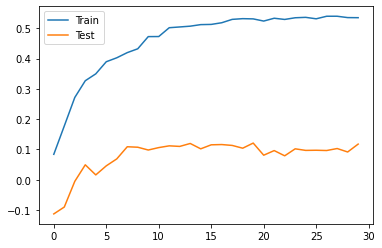

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

X_col = []
Train_list = []
Test_list = []
for i in vif_sort["features"]:
    X_col.append(i)
    var_col=data[X_col] #feature
    y #label
    GBR = GradientBoostingRegressor(random_state=999, max_depth=3)
    GBR.fit(X_train, y_train)
    X_train, X_test, y_train, y_test = train_test_split(var_col,y,random_state=999)
    GBR.fit(X_train, y_train)
    
#     print(f'{i}컬럼까지 사용')
#     print("Train 정확도 :",GBR.score(X_train, y_train))
#     print("Test 정확도 :",GBR.score(X_test, y_test))
    
    train_pred_y = GBR.predict(X_train)
    test_pred_y = GBR.predict(X_test)
    
#     print("Train 오차 : ",np.sqrt(mean_squared_error(train_pred_y, y_train)))
#     print("Test 오차 : ",np.sqrt(mean_squared_error(test_pred_y, y_test)))
#     print(" ")
    
    Train_scor=GBR.score(X_train, y_train)
    Train_list.append(Train_scor)
    Test_scor=GBR.score(X_test, y_test)
    Test_list.append(Test_scor)
    
plt.plot(range(0, len(Train_list)), Train_list, label="Train")
plt.plot(range(0, len(Train_list)), Test_list, label="Test")
plt.legend()
plt.show()

In [23]:
GBR = GradientBoostingRegressor(random_state=9500, n_estimators=100)
GBR.fit(X_train, y_train)

print('SCORE')
print(GBR.score(X_train, y_train))
print(GBR.score(X_test, y_test))

train_pred_y = GBR.predict(X_train)
test_pred_y = GBR.predict(X_test)

print('RMSE')
print(np.sqrt(mean_squared_error(train_pred_y, y_train)))
print(np.sqrt(mean_squared_error(test_pred_y, y_test)))

SCORE
0.5352935949060732
0.11067576047485894
RMSE
9.235078854818525
12.814518575468318


### 결과 : 과소적합
- train 데이터에 대한 정확도는 조금 더 높아 졌지만 여전히 과소적합임을 알 수 있다.

#### 원인 예측
- 복잡한 모델을 사용해도 여전히 과소적합을 보여주어 데이터셋이 부족하다고 예측
#### 해소 방안
- 하이퍼 파라미터 수정과 교차검증을 위해 그리드 서치 사용

## GridSearch CV
- loss :   # 손실함수 종류 선택
- n_estimators :   # 앙상블 모델 갯수
- learning_rate :  # 학습률
- max_depth :     # 부스팅 할 땐 최대깊이 일반적으로 깊게 설정x

In [24]:
from sklearn.model_selection import GridSearchCV #cv의 약자는 cross validation 
param_grid = {
    "learning_rate" : [ 0.01, 0.05, 0.1],
    "n_estimators" : [50, 100, 150, 200, 300, 500],
    "max_depth" : [2, 3, 4]
}

model = GradientBoostingRegressor(random_state=999)
grid = GridSearchCV(model, param_grid, cv=7, n_jobs=-1) 
grid.fit(X_train, y_train)

print("최고점수 :",grid.best_score_)
print("최고조합 :",grid.best_params_)
print("최고모델 :",grid.best_estimator_)

최고점수 : 0.1544445744041084
최고조합 : {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
최고모델 : GradientBoostingRegressor(max_depth=2, random_state=999)


### 결과 : 과소적합
- 하이퍼파라미터 수정과 교차검증을 수행하였음에도 성능향상의 기미가 보이지 않았다.
#### 원인 예측
- 모델 설계 과정에서 수위와 같은 변수를 반영하지 못한 것이 주 원인으로 생각된다.
#### 해소 방안
- 수위 변수를 구할 수 없으므로 비지도 학습을 통해 각도에서 새로운 특성 추출을 시도한다.

# 비지도학습 : 군집화

In [17]:
# !pip install scipy

In [25]:
# 결측치, 이상치 제거된 데이터 저장
data.to_csv("data/rawdata(2).csv", encoding="UTF-8-sig", index=False)

In [46]:
# 결측치, 이상치 제거된 데이터 로드
data2 = pd.read_csv('data/rawdata(2).csv',encoding='utf-8')
data2

y1  y2  y3  y4  y5  y6  y7  y8  y9  y10  y11  y12  y13  y14  y15  y16  \
0     0   1   7  13  22  31  35  39  44   50   54   56   56   57   58   60   
1     0   3   7  13  18  22  29  31  33   36   40   44   46   47   49   51   
2    -8   0   8  15  22  27  30  33  37   41   43   45   46   47   48   50   
3    -5  -1   1   5  11  15  19  25  29   33   37   39   40   41   41   41   
4    13  13  15  19  24  27  30  33  36   37   38   39   40   40   40   40   
5    11  11  13  17  20  26  31  35  38   40   41   41   41   42   44   43   
6     7  10  13  16  20  24  29  34  38   41   43   45   46   47   47   48   
7    12  15  17  21  25  30  34  38  41   44   49   51   52   53   54   55   
8     0  -1   0   7  13  19  26  31  35   39   42   45   48   51   53   54   
9    18  21  26  31  35  38  41  43  45   47   49   51   53   55   56   57   
10   37  41  44  47  50  53  57  59  61   62   63   63   64   65   65   66   
11   12  17  23  29  35  39  45  50  55   59   61   63   64   65   66   66   
12   -4   0   1   1   2   7  14  23  32   40   45   50   52   54   55   56   
13   12  19  26  34  40  48  54  59  64   68   70   72   73   73   72   72   
14   20  25  29  36  43  48  52  56  60   64   69   73   74   75   75   75   
15   28  35  39  45  50  56  61  65  69   72   73   74   75   75   75   76   
16    6  10  16  26  36  44  52  61  68   73   77   80   81   82   82   83   
17    9  10  17  22  30  36  42  46  50   53   56   58   58   59   59   59   
18   23  27  34  43  50  56  61  65  66   68   69   70   70   70   70   70   
19    0   1   4   9  13  16  21  27  33   38   42   45   47   49   51   52   
20   10  13  17  22  27  32  35  39  42   45   47   49   50   51   51   51   
21    9  11  13  16  21  26  34  39  44   48   51   52   53   54   54   54   
22    2   3   8  12  16  22  28  33  36   39   41   43   45   46   47   47   
23   19  23  28  33  38  43  47  50  53   55   56   57   57   57   57   57   
24   18  22  24  29  34  38  43  47  51   54   57   59   61   61   61   61   
25    3   6  12  18  23  28  38  44  49   54   58   61   65   66   67   68   
26   16  21  29  38  44  48  51  54  57   59   61   61   62   63   63   63   
27   21  27  35  41  46  50  52  53  54   54   54   54   54   54   54   54   
28   38  43  46  49  51  52  53  53  53   53   53   53   53   53   53   53   
29   32  39  47  52  55  58  59  60  60   59   59   59   58   57   57   57   
30   40  43  45  47  48  48  48  48  48   48   48   48   49   49   50   51   
31   49  54  57  59  61  63  64  64  64   65   66   66   66   66   66   66   
32   13  18  24  30  37  42  47  51  52   53   53   53   53   53   53   53   
33    0   2   4   7  12  17  22  28  33   35   37   40   43   45   47   49   
34   23  25  29  33  35  39  42  45  47   49   51   52   52   52   53   54   
35   23  27  33  39  43  49  55  58  62   66   65   63   63   62   61   60   
36    0   2   6  12  19  26  36  43  49   54   59   64   66   68   69   70   
37    9  10  14  21  31  37  42  47  51   54   56   57   58   59   60   60   
38   20  20   3   7  13  23  34  42  47   50   52   55   55   55   55   55   
39    2   6  12  21  29  37  42  45  49   54   58   60   62   63   63   63   
40   -1  -1   0   6  13  22  32  40  48   56   62   67   66   66   67   66   
41   12  16  22  30  37  43  49  52  55   59   62   63   63   64   64   64   
42    0   2   6  12  19  27  34  40  45   48   51   55   58   61   64   65   
43   18  21  26  33  40  44  48  52  54   56   58   60   62   63   64   65   
44    0   1   2   9  19  28  34  38  40   44   48   50   51   52   53   53   
45   14  18  22  29  33  37  40  42  44   45   46   47   47   47   47   47   
46    1   5   9  15  21  25  29  33  37   40   43   46   49   51   53   54   
47    0   1   1   3   9  15  21  26  32   36   39   42   45   48   50   52   
48    0   2   9  19  26  32  38  44  49   52   54   56   58   59   59   60   
49    3   6  11  18  25  30  35  40  45   48   51   53   56   59   61   62   
50    1   4   8  13  19  28

In [47]:
# 비지도 학습이기 때문에 특성 데이터만 남겨놓는다.
X2 = data2.iloc[:, :-1]
print(X2.shape)

(985, 30)


## 덴드로 그램

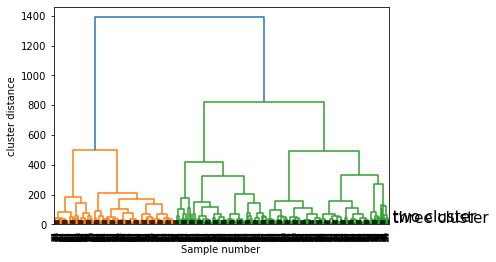

In [29]:
from scipy.cluster.hierarchy import dendrogram, ward
import matplotlib.pyplot as plt

linkage_array = ward(X2) # 각도를 넣었으니 각도에 따른 군집

# 클러스터 간의 거리 정보가 담긴 linkage_array를 사용해 덴드로그램을 그림
dendrogram(linkage_array)

# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시
ax = plt.gca() # 현재 그려진 그래프의 정보를 가지고오는 함수
bounds = ax.get_xbound() # x축정보를 가지고옴

ax.plot(bounds, [20, 20], '--', c='k')
ax.plot(bounds, [10, 10], '--', c='k')

ax.text(bounds[1], 20, ' two cluster', fontdict={'size': 15})
ax.text(bounds[1], 10, ' three cluster', fontdict={'size': 15})
plt.xlabel("Sample number")
plt.ylabel("cluster distance")
plt.show()

### 결과 : 3개의 군집 형성

## 클러스트링

In [30]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=3, linkage='ward')
model.fit(X2)

AgglomerativeClustering(n_clusters=3)

In [51]:
# 클러스트링 결과를 새로운 레이블 데이터로 설정 
labels = model.labels_
y2 = pd.Series(labels)
y2.name='clust'
y2=y2.astype(int)
y2

0      1
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     2
12     0
13     2
14     2
15     2
16     2
17     1
18     1
19     0
20     1
21     0
22     0
23     1
24     1
25     2
26     1
27     1
28     1
29     1
30     1
31     1
32     1
33     0
34     1
35     1
36     2
37     1
38     0
39     1
40     1
41     2
42     1
43     1
44     0
45     1
46     0
47     0
48     1
49     1
50     0
51     1
52     1
53     2
54     2
55     0
56     1
57     0
58     1
59     1
60     1
61     1
62     2
63     2
64     0
65     1
66     0
67     1
68     1
69     1
70     1
71     2
72     2
73     0
74     0
75     0
76     0
77     1
78     2
79     2
80     1
81     0
82     0
83     0
84     0
85     1
86     2
87     1
88     2
89     0
90     0
91     0
92     0
93     2
94     1
95     2
96     2
97     0
98     0
99     0
100    0
101    0
102    0
103    2
104    1
105    2
106    0
107    0
108    1
109    1
110    2
1

In [52]:
# 기존 데이터와 새로운 레이블 데이터 합치기
con = pd.concat([X2, y2], axis=1)
con

y1  y2  y3  y4  y5  y6  y7  y8  y9  y10  y11  y12  y13  y14  y15  y16  \
0     0   1   7  13  22  31  35  39  44   50   54   56   56   57   58   60   
1     0   3   7  13  18  22  29  31  33   36   40   44   46   47   49   51   
2    -8   0   8  15  22  27  30  33  37   41   43   45   46   47   48   50   
3    -5  -1   1   5  11  15  19  25  29   33   37   39   40   41   41   41   
4    13  13  15  19  24  27  30  33  36   37   38   39   40   40   40   40   
5    11  11  13  17  20  26  31  35  38   40   41   41   41   42   44   43   
6     7  10  13  16  20  24  29  34  38   41   43   45   46   47   47   48   
7    12  15  17  21  25  30  34  38  41   44   49   51   52   53   54   55   
8     0  -1   0   7  13  19  26  31  35   39   42   45   48   51   53   54   
9    18  21  26  31  35  38  41  43  45   47   49   51   53   55   56   57   
10   37  41  44  47  50  53  57  59  61   62   63   63   64   65   65   66   
11   12  17  23  29  35  39  45  50  55   59   61   63   64   65   66   66   
12   -4   0   1   1   2   7  14  23  32   40   45   50   52   54   55   56   
13   12  19  26  34  40  48  54  59  64   68   70   72   73   73   72   72   
14   20  25  29  36  43  48  52  56  60   64   69   73   74   75   75   75   
15   28  35  39  45  50  56  61  65  69   72   73   74   75   75   75   76   
16    6  10  16  26  36  44  52  61  68   73   77   80   81   82   82   83   
17    9  10  17  22  30  36  42  46  50   53   56   58   58   59   59   59   
18   23  27  34  43  50  56  61  65  66   68   69   70   70   70   70   70   
19    0   1   4   9  13  16  21  27  33   38   42   45   47   49   51   52   
20   10  13  17  22  27  32  35  39  42   45   47   49   50   51   51   51   
21    9  11  13  16  21  26  34  39  44   48   51   52   53   54   54   54   
22    2   3   8  12  16  22  28  33  36   39   41   43   45   46   47   47   
23   19  23  28  33  38  43  47  50  53   55   56   57   57   57   57   57   
24   18  22  24  29  34  38  43  47  51   54   57   59   61   61   61   61   
25    3   6  12  18  23  28  38  44  49   54   58   61   65   66   67   68   
26   16  21  29  38  44  48  51  54  57   59   61   61   62   63   63   63   
27   21  27  35  41  46  50  52  53  54   54   54   54   54   54   54   54   
28   38  43  46  49  51  52  53  53  53   53   53   53   53   53   53   53   
29   32  39  47  52  55  58  59  60  60   59   59   59   58   57   57   57   
30   40  43  45  47  48  48  48  48  48   48   48   48   49   49   50   51   
31   49  54  57  59  61  63  64  64  64   65   66   66   66   66   66   66   
32   13  18  24  30  37  42  47  51  52   53   53   53   53   53   53   53   
33    0   2   4   7  12  17  22  28  33   35   37   40   43   45   47   49   
34   23  25  29  33  35  39  42  45  47   49   51   52   52   52   53   54   
35   23  27  33  39  43  49  55  58  62   66   65   63   63   62   61   60   
36    0   2   6  12  19  26  36  43  49   54   59   64   66   68   69   70   
37    9  10  14  21  31  37  42  47  51   54   56   57   58   59   60   60   
38   20  20   3   7  13  23  34  42  47   50   52   55   55   55   55   55   
39    2   6  12  21  29  37  42  45  49   54   58   60   62   63   63   63   
40   -1  -1   0   6  13  22  32  40  48   56   62   67   66   66   67   66   
41   12  16  22  30  37  43  49  52  55   59   62   63   63   64   64   64   
42    0   2   6  12  19  27  34  40  45   48   51   55   58   61   64   65   
43   18  21  26  33  40  44  48  52  54   56   58   60   62   63   64   65   
44    0   1   2   9  19  28  34  38  40   44   48   50   51   52   53   53   
45   14  18  22  29  33  37  40  42  44   45   46   47   47   47   47   47   
46    1   5   9  15  21  25  29  33  37   40   43   46   49   51   53   54   
47    0   1   1   3   9  15  21  26  32   36   39   42   45   48   50   52   
48    0   2   9  19  26  32  38  44  49   52   54   56   58   59   59   60   
49    3   6  11  18  25  30  35  40  45   48   51   53   56   59   61   62   
50    1   4   8  13  19  28

In [53]:
# 불리언 인덱싱을 활영하여 각 클러스트 별로 분리
list0 = con[con["clust"]==0]
list1 = con[con["clust"]==1]
list2 = con[con["clust"]==2]

In [54]:
# 0번 클러스트 통계지표 분석
list0.describe()

y1          y2          y3          y4          y5          y6  \
count  361.000000  361.000000  361.000000  361.000000  361.000000  361.000000   
mean     2.257618    4.307479    8.099723   13.756233   19.603878   25.160665   
std      3.229655    3.850999    4.505679    4.707721    4.720038    4.651965   
min     -8.000000   -1.000000    0.000000    1.000000    2.000000    7.000000   
25%      0.000000    1.000000    5.000000   11.000000   17.000000   23.000000   
50%      1.000000    4.000000    8.000000   14.000000   20.000000   25.000000   
75%      3.000000    6.000000   11.000000   17.000000   23.000000   28.000000   
max     20.000000   20.000000   21.000000   25.000000   30.000000   36.000000   

               y7          y8          y9         y10         y11         y12  \
count  361.000000  361.000000  361.000000  361.000000  361.000000  361.000000   
mean    30.204986   34.639889   38.407202   41.540166   44.268698   46.529086   
std      4.632263    4.581723    4.521904    4.430848    4.447514    4.484524   
min     14.000000   18.000000   21.000000   24.000000   26.000000   28.000000   
25%     28.000000   32.000000   36.000000   39.000000   42.000000   44.000000   
50%     31.000000   35.000000   39.000000   42.000000   45.000000   47.000000   
75%     33.000000   38.000000   41.000000   45.000000   47.000000   50.000000   
max     41.000000   45.000000   51.000000   53.000000   56.000000   58.000000   

              y13         y14         y15         y16         y17         y18  \
count  361.000000  361.000000  361.000000  361.000000  361.000000  361.000000   
mean    48.324100   49.764543   50.795014   51.457064   51.897507   52.083102   
std      4.508966    4.569520    4.648426    4.768993    4.910083    5.006525   
min     30.000000   31.000000   32.000000   34.000000   35.000000   37.000000   
25%     46.000000   47.000000   48.000000   49.000000   49.000000   49.000000   
50%     49.000000   51.000000   51.000000   52.000000   53.000000   53.000000   
75%     52.000000   53.000000   54.000000   55.000000   56.000000   56.000000   
max     59.000000   59.000000   60.000000   62.000000   63.000000   63.000000   

              y19         y20         y21         y22         y23         y24  \
count  361.000000  361.000000  361.000000  361.000000  361.000000  361.000000   
mean    52.180055   52.085873   52.008310   51.853186   51.673130   51.457064   
std      5.097193    5.164607    5.229982    5.289197    5.395324    5.507970   
min     37.000000   36.000000   36.000000   35.000000   34.000000   34.000000   
25%     49.000000   49.000000   49.000000   48.000000   48.000000   48.000000   
50%     53.000000   53.000000   53.000000   53.000000   53.000000   52.000000   
75%     56.000000   56.000000   56.000000   56.000000   56.000000   56.000000   
max     63.000000   62.000000   63.000000   63.000000   63.000000   63.000000   

              y25         y26         y27         y28         y29         y30  \
count  361.000000  361.000000  361.000000  361.000000  361.000000  361.000000   
mean    51.229917   50.950139   50.609418   50.257618   49.867036   49.329640   
std      5.576219    5.628080    5.745996    5.860660    5.988790    6.172019   
min     33.000000   33.000000   33.000000   32.000000   32.000000   27.000000   
25%     47.000000   47.000000   47.000000   46.000000   46.000000   45.000000   
50%     52.000000   52.000000   52.000000   51.000000   51.000000   50.000000   
75%     55.000000   55.000000   55.000000   55.000000   55.000000   54.000000   
max     63.000000   63.000000   63.000000   63.000000   63.000000   63.000000   

       clust  
count  361.0  
mean     0.0  
std      0.0  
min      0.0  
25%      0.0  
50%      0.0  
75%      0.0  
max      0.0

In [55]:
# 1번 클러스트 통계지표 분석
list1.describe()

y1          y2          y3          y4          y5          y6  \
count  355.000000  355.000000  355.000000  355.000000  355.000000  355.000000   
mean     5.349296    8.014085   12.608451   18.814085   25.194366   31.129577   
std      8.095595    8.901680    9.348944    8.869380    8.250251    7.445857   
min     -5.000000   -2.000000   -1.000000    0.000000    8.000000   15.000000   
25%      0.000000    2.000000    6.000000   12.000000   19.000000   25.000000   
50%      2.000000    6.000000   11.000000   18.000000   25.000000   31.000000   
75%      7.000000   11.000000   17.000000   24.000000   30.000000   36.000000   
max     57.000000   56.000000   57.000000   59.000000   61.000000   63.000000   

               y7          y8          y9         y10         y11         y12  \
count  355.000000  355.000000  355.000000  355.000000  355.000000  355.000000   
mean    36.521127   41.205634   45.312676   48.870423   51.923944   54.487324   
std      6.690197    5.999527    5.383143    4.809959    4.367622    3.983970   
min     20.000000   25.000000   29.000000   33.000000   37.000000   42.000000   
25%     32.000000   37.000000   42.000000   46.000000   49.000000   52.000000   
50%     37.000000   41.000000   45.000000   49.000000   52.000000   54.000000   
75%     41.000000   45.000000   48.000000   52.000000   54.000000   57.000000   
max     64.000000   65.000000   66.000000   68.000000   69.000000   70.000000   

              y13         y14         y15         y16         y17         y18  \
count  355.000000  355.000000  355.000000  355.000000  355.000000  355.000000   
mean    56.566197   58.183099   59.394366   60.278873   60.881690   61.233803   
std      3.777421    3.678115    3.724552    3.853017    3.999658    4.109928   
min     46.000000   46.000000   46.000000   46.000000   46.000000   46.000000   
25%     54.000000   56.000000   57.000000   58.000000   59.000000   59.000000   
50%     57.000000   58.000000   60.000000   61.000000   61.000000   62.000000   
75%     59.000000   61.000000   62.000000   63.000000   64.000000   64.000000   
max     70.000000   70.000000   70.000000   70.000000   70.000000   71.000000   

              y19         y20         y21         y22         y23         y24  \
count  355.000000  355.000000  355.000000  355.000000  355.000000  355.000000   
mean    61.408451   61.523944   61.509859   61.453521   61.349296   61.202817   
std      4.203770    4.277304    4.370133    4.447428    4.561782    4.616171   
min     46.000000   46.000000   45.000000   44.000000   43.000000   42.000000   
25%     60.000000   60.000000   60.000000   60.000000   59.000000   59.000000   
50%     62.000000   62.000000   62.000000   62.000000   62.000000   62.000000   
75%     64.000000   64.000000   64.000000   64.000000   64.000000   64.000000   
max     71.000000   71.000000   70.000000   70.000000   70.000000   70.000000   

              y25         y26         y27         y28         y29         y30  \
count  355.000000  355.000000  355.000000  355.000000  355.000000  355.000000   
mean    61.039437   60.791549   60.554930   60.284507   59.960563   59.597183   
std      4.660038    4.803652    4.886185    4.991593    5.106064    5.312653   
min     42.000000   41.000000   40.000000   39.000000   38.000000   38.000000   
25%     59.000000   58.500000   58.000000   58.000000   57.500000   57.000000   
50%     62.000000   62.000000   61.000000   61.000000   61.000000   60.000000   
75%     64.000000   64.000000   64.000000   63.000000   63.000000   63.000000   
max     70.000000   70.000000   70.000000   70.000000   70.000000   70.000000   

       clust  
count  355.0  
mean     1.0  
std      0.0  
min      1.0  
25%      1.0  
50%      1.0  
75%      1.0  
max      1.0

In [56]:
# 2번 클러스트 통계지표 분석
list2.describe()

y1          y2          y3          y4          y5          y6  \
count  269.000000  269.000000  269.000000  269.000000  269.000000  269.000000   
mean     3.431227    6.364312   11.951673   19.702602   27.434944   34.345725   
std      5.573116    6.619255    7.367833    7.788771    7.901472    7.889831   
min     -4.000000   -1.000000    0.000000    0.000000    0.000000    3.000000   
25%      0.000000    2.000000    7.000000   15.000000   23.000000   30.000000   
50%      1.000000    4.000000   11.000000   19.000000   27.000000   34.000000   
75%      5.000000    9.000000   16.000000   24.000000   32.000000   39.000000   
max     38.000000   41.000000   45.000000   51.000000   57.000000   61.000000   

               y7          y8          y9         y10         y11         y12  \
count  269.000000  269.000000  269.000000  269.000000  269.000000  269.000000   
mean    40.657993   46.278810   51.256506   55.706320   59.531599   62.776952   
std      7.730666    7.445847    7.127124    6.784475    6.464305    6.076815   
min     11.000000   19.000000   23.000000   32.000000   39.000000   42.000000   
25%     36.000000   42.000000   47.000000   51.000000   55.000000   59.000000   
50%     41.000000   47.000000   51.000000   56.000000   59.000000   62.000000   
75%     45.000000   50.000000   55.000000   59.000000   63.000000   66.000000   
max     65.000000   70.000000   74.000000   79.000000   81.000000   82.000000   

              y13         y14         y15         y16         y17         y18  \
count  269.000000  269.000000  269.000000  269.000000  269.000000  269.000000   
mean    65.464684   67.498141   69.044610   70.078067   70.773234   71.293680   
std      5.607469    5.230240    4.911707    4.655025    4.562651    4.560456   
min     47.000000   51.000000   55.000000   58.000000   61.000000   63.000000   
25%     62.000000   64.000000   66.000000   67.000000   68.000000   68.000000   
50%     65.000000   67.000000   68.000000   69.000000   70.000000   70.000000   
75%     69.000000   71.000000   72.000000   72.000000   73.000000   73.000000   
max     84.000000   85.000000   86.000000   86.000000   86.000000   87.000000   

              y19         y20         y21         y22         y23         y24  \
count  269.000000  269.000000  269.000000  269.000000  269.000000  269.000000   
mean    71.565056   71.836431   71.944238   71.996283   71.970260   71.955390   
std      4.550755    4.586158    4.592403    4.612198    4.628659    4.672668   
min     64.000000   65.000000   65.000000   64.000000   64.000000   64.000000   
25%     68.000000   69.000000   69.000000   69.000000   69.000000   69.000000   
50%     70.000000   71.000000   71.000000   71.000000   71.000000   71.000000   
75%     74.000000   74.000000   74.000000   74.000000   74.000000   75.000000   
max     87.000000   88.000000   88.000000   89.000000   88.000000   89.000000   

              y25         y26         y27         y28         y29         y30  \
count  269.000000  269.000000  269.000000  269.000000  269.000000  269.000000   
mean    71.832714   71.691450   71.498141   71.312268   71.044610   70.587361   
std      4.714804    4.789366    4.836602    4.856051    4.960089    5.188678   
min     64.000000   64.000000   64.000000   64.000000   63.000000   55.000000   
25%     68.000000   68.000000   68.000000   68.000000   67.000000   67.000000   
50%     71.000000   71.000000   70.000000   70.000000   70.000000   69.000000   
75%     75.000000   75.000000   75.000000   75.000000   74.000000   74.000000   
max     89.000000   89.000000   89.000000   89.000000   89.000000   88.000000   

       clust  
count  269.0  
mean     2.0  
std      0.0  
min      2.0  
25%      2.0  
50%      2.0  
75%      2.0  
max      2.0

### 결과 
- 군집별 통계 지표
    - 0 : mean(66) min(32) max(112)
    - 1 : mean(71) min(31) max(109)
    - 2 : mean(78) min(44) max(110)
- 각도에 따라 약간의 차이는 있었지만, 범위가 너무 넓어서 유량 예측에 활용하기는 어려울 것이라고 판단

## 물 마시는 각도 패턴 시각화

100%|██████████| 361/361 [00:00<00:00, 751.96it/s]


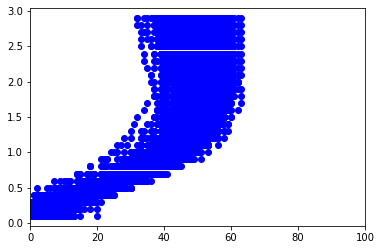

100%|██████████| 355/355 [00:00<00:00, 779.12it/s]


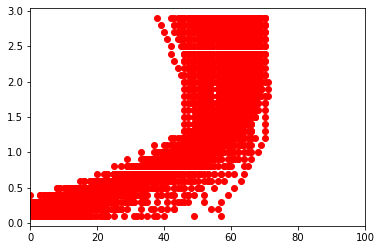

100%|██████████| 269/269 [00:00<00:00, 480.67it/s]


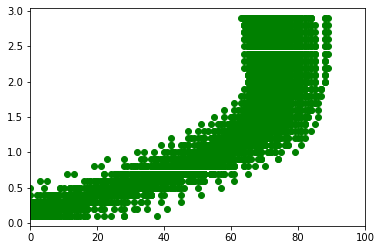

In [61]:
from tqdm import tqdm 

clust0=list0.iloc[:, 0:-2]
clust1=list1.iloc[:, 0:-2]
clust2=list2.iloc[:, 0:-2]

cnt = []
for i in range(1,30):
    cnt.append(i/10)
    
for i in tqdm(range(0,len(clust0.index))):
    clust0=list0.iloc[:, 0:-2]
    clust0=clust0.T
    clust0=clust0.iloc[:, i]
    clusta=clust0.to_list()
    plt.scatter(clusta, cnt, color='blue')
    plt.xlim(0,100)
plt.show()
for i in tqdm(range(0,len(clust1.index))):
    clust1=list1.iloc[:, 0:-2]
    clust1=clust1.T
    clust1=clust1.iloc[:, i]
    clustb=clust1.to_list()
    plt.scatter(clustb, cnt, color='red')
    plt.xlim(0,100)
plt.show()
for i in tqdm(range(0,len(clust2.index))):
    clust2=list2.iloc[:, 0:-2]
    clust2=clust2.T
    clust2=clust2.iloc[:, i]
    clustc=clust2.to_list()
    plt.scatter(clustc, cnt, color='green')
    plt.xlim(0,100)
plt.show()

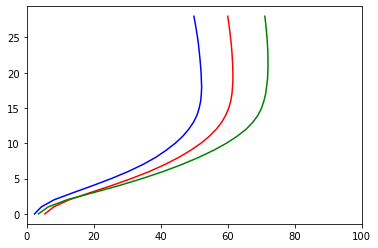

In [62]:
m_list0=list0.iloc[:, 0:-2].mean()
m_list1=list1.iloc[:, 0:-2].mean()
m_list2=list2.iloc[:, 0:-2].mean()

plt.plot(m_list0, range(0, len(m_list0)), color='blue', label="0")
plt.plot(m_list1, range(0, len(m_list1)), color='red', label="1")
plt.plot(m_list2, range(0, len(m_list2)), color='green', label="2")

plt.xlim(0,100)
plt.show()

### 대안 제시
- 회귀분석은 실패하였으나 군집화로 인한 물 마시는 각도에 따른 패턴 분석이 가능한지 학습 시도

# 지도학습 : 분류

## Gradient Boost Model

In [57]:
# train데이터 test데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, random_state=999)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((738, 30), (247, 30), (738,), (247,))

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(X_train, y_train)
print("Train 정확도 :", GBC.score(X_train, y_train))
print("Test 정확도 :", GBC.score(X_test, y_test))

Train 정확도 : 1.0
Test 정확도 : 0.9352226720647774


### 결과
- 비지도 학습으로 물 마시는 각도 변화에 따른 패턴을 라벨링하여 분류한 결과 93%의 정확도를 기록
- 가속도 센서로 유량 예측은 실패하였지만 물 마시는 패턴에 따른 분류는 가능하였다.

In [41]:
from sklearn.model_selection import train_test_split

X3 =con.iloc[:, :-2]
y3 =con.iloc[:, -2]

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, random_state=999)
X_train3.shape, X_test3.shape, y_train3.shape, y_test3.shape

((738, 30), (247, 30), (738,), (247,))